In [1]:
from bs4 import BeautifulSoup as bs
import requests
import re
from splinter import Browser
import pandas as pd
import itertools
from datetime import datetime

In [2]:
team_csv = pd.read_csv('team_name_lookup.csv')
team_csv

,team_id,team_abbrev,team_full,league,division
0,1,ARI,Arizona Diamondbacks,NL,WEST
1,2,ATL,Atlanta Braves,NL,EAST
2,3,BAL,Baltimore Orioles,AL,EAST
3,4,BOS,Boston Red Sox,AL,EAST
4,5,CHW,Chicago White Sox,AL,CENTRAL
5,6,CHC,Chicago Cubs,NL,CENTRAL
6,7,CIN,Cincinnati Reds,NL,CENTRAL
7,8,CLE,Cleveland Indians,AL,CENTRAL
8,9,COL,Colorado Rockies,NL,WEST
9,10,DET,Detroit Tigers,AL,CENTRAL


In [3]:
player_csv = pd.read_csv('Washington_Players')
player_csv

,playerID,playerName,teamID,majorsFlag,fortyManFlag,injuryStatus,positions,bats,throws,height,weight,dateOfBirth,serviceTime,imgUrl
0,baldalb01,Alberto Baldonado,30.0,1.0,1.0,NaN,Pitcher,L,L,76,250,"February 1, 1993",0.000,https://www.baseball-reference.com/req/2021080...
1,finnkyl01,Kyle Finnegan,30.0,1.0,1.0,NaN,Pitcher,R,R,74,200,"September 4, 1991",1.000,https://www.baseball-reference.com/req/2021080...
2,grayjos01,Josiah Gray,30.0,1.0,1.0,NaN,Pitcher,R,R,73,190,"December 21, 1997",0.000,https://www.baseball-reference.com/req/2021080...
3,thommas01,Mason Thompson,30.0,1.0,1.0,NaN,Pitcher,R,R,79,223,"February 20, 1998",0.000,https://www.baseball-reference.com/req/2021080...
4,espipao01,Paolo Espino,30.0,1.0,1.0,NaN,Pitcher,R,R,70,215,"January 10, 1987",0.078,https://www.baseball-reference.com/req/2021080...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,sancadr01,Adrian Sanchez,30.0,0.0,0.0,NaN,"Pinch Hitter, Second Baseman and Third Baseman",R,R,72,208,"August 16, 1990",1.083,https://www.baseball-reference.com/req/2021080...
61,schemax01,Max Scherzer,14.0,1.0,1.0,NaN,Pitcher,R,R,75,208,"July 27, 1984",12.079,https://www.baseball-reference.com/req/2021080...
62,schwkyl01,Kyle Schwarber,4.0,1.0,1.0,NaN,Leftfielder and Catcher,L,R,72,229,"March 5, 1993",5.086,https://www.baseball-reference.com/req/2021080...
63,turntre01,Trea Turner,14.0,1.0,1.0,NaN,"Shortstop, Second Baseman and Centerfielder",R,R,74,185,"June 30, 1993",4.135,https://www.baseball-reference.com/req/2021080...


In [4]:
#Define Executable Path for ChromeDriver to use for web scraping

executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [5]:
# Define base endpoint URL. Other url's will be built off this endpoint.

baseball_reference_main = 'https://www.baseball-reference.com'
nats_schedule_endpoint = '/teams/WSN/2021-schedule-scores.shtml'
nats_schedule_page = baseball_reference_main + nats_schedule_endpoint
browser.visit(nats_schedule_page)

<html class="js cookies localstorage sessionstorage cors history csspositionsticky no-touchevents pointerevents matchmedia flexwrap desktop is_live" data-root="/home/br/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en" style=""><head><script src="https://cdn.krxd.net/userdata/get?pub=9427dd0d-835c-471c-a5db-ab01ae8a681c&amp;technographics=1&amp;callback=Krux.ns.investingchannelinc.kxjsonp_userdata" type="text/javascript"></script><script src="https://beacon.krxd.net/optout_check?callback=Krux.ns.investingchannelinc.kxjsonp_optOutCheck" type="text/javascript"></script><script src="https://consumer.krxd.net/consent/get/9427dd0d-835c-471c-a5db-ab01ae8a681c?idt=device&amp;dt=kxcookie&amp;callback=Krux.ns.investingchannelinc.kxjsonp_consent_get_0" type="text/javascript"></script><script async="" src="//cdn.krxd.net/ctjs/controltag.js.a1705c5ac5f06cf0c202ff70908fc042"></script><script async="" src="https://static.criteo.net/js/ld/publishertag.prebid.j
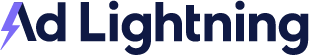

In [6]:
#Use Beautiful Soup HTML.parser to extract relvant details about news articles

schedule_html = browser.html
schedule_soup = bs(schedule_html, 'html.parser')
schedule_soup

In [7]:
# Extract list of games

game_listings = schedule_soup.find('table', class_="sortable stats_table now_sortable", id="team_schedule").find('tbody').find_all('tr',class_=lambda x: x != 'thead')
game_listings

[<tr data-row="0"><th class="right" data-stat="team_game" scope="row">1</th><td class="left" csk="2021-04-06" data-stat="date_game"><a href="/boxes/?date=2021-04-06" name="1" title="Click for standings on this date">Tuesday, Apr 6</a></td><td class="left" data-stat="boxscore"><a href="/boxes/WAS/WAS202104060.shtml">boxscore</a></td><td class="left" data-stat="team_ID">WSN</td><td class="left iz" data-stat="homeORvis"></td><td class="left" data-stat="opp_ID"><a href="/teams/ATL/2021.shtml">ATL</a></td><td class="left" data-stat="win_loss_result">W-wo</td><td class="right" data-stat="R">6</td><td class="right" data-stat="RA">5</td><td class="right iz" csk="8.50" data-stat="extra_innings"></td><td class="right" csk="1.0" data-stat="win_loss_record">1-0</td><td class="right" data-stat="rank">2</td><td class="right" csk="2" data-stat="games_back"> 1.0</td><td class="left" data-stat="winning_pitcher"><a href="/players/h/hudsoda01.shtml" title="Daniel Hudson">Hudson</a></td><td class="left" d

In [8]:
GAME_info = []
GAME_beg_columns = ['gameDateFull','gameYear','awayTeam','awayScore','homeTeam','homeScore']
HIT_info = []
HIT_beg_columns = []
PITCH_beg_columns = []
PITCH_info = []
game_number = 0
limit = 200

for index, game in enumerate(game_listings):
    if index == limit:
        break
    game_number += 1
    boxscore = game.find_all('td')[1]
    boxscore_validation = boxscore.text
    if boxscore_validation == 'boxscore':
        boxscore_endpoint = boxscore.a['href']
        boxscore_url = baseball_reference_main + boxscore_endpoint
        browser.visit(boxscore_url)
        box_html = browser.html
        box_soup = bs(box_html, 'html.parser')

        # General game details for GAME instances. Prior to additional cleaning

#         score_metadata = box_soup.find('div', class_ = 'scorebox_meta').find_all('div')
#         game_meta_data = []
#         for datapoint in score_metadata[:5]:
#             meta_contents = datapoint.contents
#             if len(meta_contents) > 1:
#                 key_value_split = meta_contents[1].split(": ")[-1]
#                 game_meta_data.append(key_value_split)
#             else:
#                 key_value_split = meta_contents[0].split(": ",1)[-1]
#                 game_meta_data.append(key_value_split)   
#         full_date = game_meta_data[0]
#         year = full_date.split(',')[-1].strip()
#         date_object = datetime.strptime(full_date, "%A, %B %d, %Y")
#         date_iso = date_object.date().isoformat()
#         gen_game_info = box_soup.find('table', class_ = 'linescore nohover stats_table no_freeze').find('tbody').find_all('tr')
#         gen_game_by_team = []
#         gen_game_by_team.append(date_iso)
#         gen_game_by_team.append(year)
#         for index, team in enumerate(gen_game_info):
#             data = team.find_all('td')
#             team_name = data[1].text.strip()
#             team_runs = data[-3].text.strip()
#             if index == 0:
#                 team_designation = 'AWAY'
#             else:
#                 team_designation = 'HOME'
#             gen_game_by_team.append(team_name)
#             gen_game_by_team.append(team_runs)
#         GAME_info.append(gen_game_by_team)

#         # Boxscore Hitting Statistics. Player-by-player

#         nats_batting = box_soup.find('table', id="WashingtonNationalsbatting")
        
#         if game_number == 1:
#             nats_hitting_headers = box_soup.find('div', id="div_WashingtonNationalsbatting").find('thead').find('tr').find_all('th')
#             HIT_beg_columns.append('GAME_ID')
#             HIT_beg_columns.append('Name')
#             HIT_beg_columns.append('Position')
#             for header in nats_hitting_headers:
#                 one_header = header.text
#                 if one_header != 'Batting':
#                     HIT_beg_columns.append(one_header) 
#                 else:
#                     pass
#         else:
#             pass

#         nats_hitstats_location = box_soup.find('div', id="div_WashingtonNationalsbatting").find('tbody')
#         names_positions_stats = nats_hitstats_location.find_all('tr')

#         for players in names_positions_stats:
#             hit_list_atts = []
#             hit_list_atts.append(game_number)
#             name_and_position = players.find('th')
#             player_content_length = len(name_and_position.contents)
#             try:
#                 if player_content_length == 2:
#                     player_name = name_and_position.contents[0].text
#                     player_position = name_and_position.contents[1]
#                 else:
#                     player_name = name_and_position.contents[1].text
#                     player_position = name_and_position.contents[2]
#                 stats_for_players = players.find_all('td')
#                 hit_list_atts.append(player_name)
#                 hit_list_atts.append(player_position)
#                 for stat in stats_for_players:
#                     each_stat = stat.text
#                     hit_list_atts.append(each_stat)
#             except IndexError:
#                 pass
#             HIT_info.append(hit_list_atts)
            
        # Boxscore Pitching Statistics. Player-by-Player
        
        #nats_pitch_stats_location = box_soup.find('table', id="WashingtonNationalspitching")
        
        if game_number == 1:
            nats_pitch_headers = box_soup.find('div', id="div_WashingtonNationalspitching").find('thead').find('tr').find_all('th')
            PITCH_beg_columns.append('GAME_ID')
            for header in nats_pitch_headers:
                one_header = header.text
                PITCH_beg_columns.append(one_header)
            PITCH_beg_columns.append('SPFlag')
            PITCH_beg_columns.append('HBP')
            PITCH_beg_columns.append('IBB')
            PITCH_beg_columns.append('W')
            PITCH_beg_columns.append('L')
            PITCH_beg_columns.append('H.1')
            PITCH_beg_columns.append('S')
            PITCH_beg_columns.append('BS')
        else:
            pass
        
        nats_pitchstats_location = box_soup.find('div', id="div_WashingtonNationalspitching").find('tbody')
        names_pitch_stats = nats_pitchstats_location.find_all('tr')
        hbp_indiv_events_html = box_soup.find('div', class_="indiv_events").find(string=re.compile("HBP:")).find_parent('div')
        hbp_results = hbp_indiv_events_html.contents[1:]
        hbp_string = hbp_results[0].replace(u'\xa0', u' ')
        ibb_indiv_events_html = box_soup.find('div', class_="indiv_events").find(string=re.compile("IBB:")).find_parent('div')
        ibb_results = ibb_indiv_events_html.contents[1:]
        ibb_string = ibb_results[0].replace(u'\xa0', u' ')
        All_pitchers_Info = []
        for index_player, players in enumerate(names_pitch_stats):
            pitch_list_atts = []
            pitch_list_atts.append(game_number)
            names_and_records = players.find('th')
            player_content_length = len(names_and_records.contents)  
            player_name = names_and_records.contents[0].text
            pitch_list_atts.append(player_name)
            stats_for_players = players.find_all('td')
            for stat in stats_for_players:
                each_stat = stat.text
                pitch_list_atts.append(each_stat)
            if index_player == 0:
                pitch_list_atts.append(1)
            else:
                pitch_list_atts.append(0)
            if player_name in hbp_string:
                player_beginning_loc = hbp_string.find(player_name)
                player_beginning = hbp_string[player_beginning_loc:]
                start_grouping = player_beginning.find("(") + len("(")
                end_grouping = player_beginning.find(")")
                if end_grouping > start_grouping & start_grouping != 0:
                    hbp_log_instances = player_beginning[start_grouping:end_grouping]
                    hbp_log_all_instances = hbp_log_instances.split(",")
                    total_hbp = len(hbp_log_all_instances)
                    pitch_list_atts.append(total_hbp)
                else:
                    pitch_list_atts.append(0)
                #print(f'{player_name} hit {total_hbp} batter(s)')
            else:
                #print(f'{player_name} did NOT hit anyone')
                pitch_list_atts.append(0)
            if player_name in ibb_string:
                player_beginning_loc = ibb_string.find(player_name)
                player_beginning = ibb_string[player_beginning_loc:]
                start_grouping = player_beginning.find("(") + len("(")
                end_grouping = player_beginning.find(")")
                if end_grouping > start_grouping & start_grouping != 0:
                    ibb_log_instances = player_beginning[start_grouping:end_grouping]
                    ibb_log_all_instances = ibb_log_instances.split(",")
                    total_ibb = len(ibb_log_all_instances)
                    pitch_list_atts.append(total_ibb)
                else:
                    pitch_list_atts.append(0)
                #print(f'{player_name} hit {total_hbp} batter(s)')
            else:
                #print(f'{player_name} did NOT hit anyone')
                pitch_list_atts.append(0)
            if player_content_length == 2:
                player_decision = names_and_records.contents[1]
                decision_split = player_decision.split()
                decisionsToCheck = ['W', 'L', 'H', 'S', 'BS']
                for decision in decisionsToCheck:
                    if decision in decision_split:
                        pitch_list_atts.append(1)
                    else:
                        pitch_list_atts.append(0)
            else:
                pitch_list_atts.extend([0] * 5)
            PITCH_info.append(pitch_list_atts)
        # Game Counter
        print(f'Game {game_number} scraped')
    else:
        print('Game has not yet occured')

Game 1 scraped
Game 2 scraped
Game 3 scraped
Game 4 scraped
Game 5 scraped
Game 6 scraped
Game 7 scraped
Game 8 scraped
Game 9 scraped
Game 10 scraped
Game 11 scraped
Game 12 scraped
Game 13 scraped
Game 14 scraped
Game 15 scraped
Game 16 scraped
Game 17 scraped
Game 18 scraped
Game 19 scraped
Game 20 scraped
Game 21 scraped
Game 22 scraped
Game 23 scraped
Game 24 scraped
Game 25 scraped
Game 26 scraped
Game 27 scraped
Game 28 scraped
Game 29 scraped
Game 30 scraped
Game 31 scraped
Game 32 scraped
Game 33 scraped
Game 34 scraped
Game 35 scraped
Game 36 scraped
Game 37 scraped
Game 38 scraped
Game 39 scraped
Game 40 scraped
Game 41 scraped
Game 42 scraped
Game 43 scraped
Game 44 scraped
Game 45 scraped
Game 46 scraped
Game 47 scraped
Game 48 scraped
Game 49 scraped
Game 50 scraped
Game 51 scraped
Game 52 scraped
Game 53 scraped
Game 54 scraped
Game 55 scraped
Game 56 scraped
Game 57 scraped
Game 58 scraped
Game 59 scraped
Game 60 scraped
Game 61 scraped
Game 62 scraped
Game 63 scraped
G

AttributeError: 'NoneType' object has no attribute 'find'

In [9]:
game_index = game_number
for index, game in enumerate(game_listings[game_index:]):
    if index == limit:
        break
    game_number += 1
    boxscore = game.find_all('td')[1]
    boxscore_validation = boxscore.text
    if boxscore_validation == 'boxscore':
        boxscore_endpoint = boxscore.a['href']
        boxscore_url = baseball_reference_main + boxscore_endpoint
        browser.visit(boxscore_url)
        box_html = browser.html
        box_soup = bs(box_html, 'html.parser')

        # General game details for GAME instances. Prior to additional cleaning

#         score_metadata = box_soup.find('div', class_ = 'scorebox_meta').find_all('div')
#         game_meta_data = []
#         for datapoint in score_metadata[:5]:
#             meta_contents = datapoint.contents
#             if len(meta_contents) > 1:
#                 key_value_split = meta_contents[1].split(": ")[-1]
#                 game_meta_data.append(key_value_split)
#             else:
#                 key_value_split = meta_contents[0].split(": ",1)[-1]
#                 game_meta_data.append(key_value_split)   
#         full_date = game_meta_data[0]
#         year = full_date.split(',')[-1].strip()
#         date_object = datetime.strptime(full_date, "%A, %B %d, %Y")
#         date_iso = date_object.date().isoformat()
#         gen_game_info = box_soup.find('table', class_ = 'linescore nohover stats_table no_freeze').find('tbody').find_all('tr')
#         gen_game_by_team = []
#         gen_game_by_team.append(date_iso)
#         gen_game_by_team.append(year)
#         for index, team in enumerate(gen_game_info):
#             data = team.find_all('td')
#             team_name = data[1].text.strip()
#             team_runs = data[-3].text.strip()
#             if index == 0:
#                 team_designation = 'AWAY'
#             else:
#                 team_designation = 'HOME'
#             gen_game_by_team.append(team_name)
#             gen_game_by_team.append(team_runs)
#         GAME_info.append(gen_game_by_team)

#         # Boxscore Hitting Statistics. Player-by-player

#         nats_batting = box_soup.find('table', id="WashingtonNationalsbatting")
        
#         if game_number == 1:
#             nats_hitting_headers = box_soup.find('div', id="div_WashingtonNationalsbatting").find('thead').find('tr').find_all('th')
#             HIT_beg_columns.append('GAME_ID')
#             HIT_beg_columns.append('Name')
#             HIT_beg_columns.append('Position')
#             for header in nats_hitting_headers:
#                 one_header = header.text
#                 if one_header != 'Batting':
#                     HIT_beg_columns.append(one_header) 
#                 else:
#                     pass
#         else:
#             pass

#         nats_hitstats_location = box_soup.find('div', id="div_WashingtonNationalsbatting").find('tbody')
#         names_positions_stats = nats_hitstats_location.find_all('tr')

#         for players in names_positions_stats:
#             hit_list_atts = []
#             hit_list_atts.append(game_number)
#             name_and_position = players.find('th')
#             player_content_length = len(name_and_position.contents)
#             try:
#                 if player_content_length == 2:
#                     player_name = name_and_position.contents[0].text
#                     player_position = name_and_position.contents[1]
#                 else:
#                     player_name = name_and_position.contents[1].text
#                     player_position = name_and_position.contents[2]
#                 stats_for_players = players.find_all('td')
#                 hit_list_atts.append(player_name)
#                 hit_list_atts.append(player_position)
#                 for stat in stats_for_players:
#                     each_stat = stat.text
#                     hit_list_atts.append(each_stat)
#             except IndexError:
#                 pass
#             HIT_info.append(hit_list_atts)
            
        # Boxscore Pitching Statistics. Player-by-Player
        
        #nats_pitch_stats_location = box_soup.find('table', id="WashingtonNationalspitching")
        
        if game_number == 1:
            nats_pitch_headers = box_soup.find('div', id="div_WashingtonNationalspitching").find('thead').find('tr').find_all('th')
            PITCH_beg_columns.append('GAME_ID')
            for header in nats_pitch_headers:
                one_header = header.text
                PITCH_beg_columns.append(one_header)
            PITCH_beg_columns.append('SPFlag')
            PITCH_beg_columns.append('HBP')
            PITCH_beg_columns.append('IBB')
            PITCH_beg_columns.append('W')
            PITCH_beg_columns.append('L')
            PITCH_beg_columns.append('H.1')
            PITCH_beg_columns.append('S')
            PITCH_beg_columns.append('BS')
        else:
            pass
        
        nats_pitchstats_location = box_soup.find('div', id="div_WashingtonNationalspitching").find('tbody')
        names_pitch_stats = nats_pitchstats_location.find_all('tr')
        hbp_indiv_events_html = box_soup.find('div', class_="indiv_events").find(string=re.compile("HBP:")).find_parent('div')
        hbp_results = hbp_indiv_events_html.contents[1:]
        hbp_string = hbp_results[0].replace(u'\xa0', u' ')
        ibb_indiv_events_html = box_soup.find('div', class_="indiv_events").find(string=re.compile("IBB:")).find_parent('div')
        ibb_results = ibb_indiv_events_html.contents[1:]
        ibb_string = ibb_results[0].replace(u'\xa0', u' ')
        All_pitchers_Info = []
        for index_player, players in enumerate(names_pitch_stats):
            pitch_list_atts = []
            pitch_list_atts.append(game_number)
            names_and_records = players.find('th')
            player_content_length = len(names_and_records.contents)  
            player_name = names_and_records.contents[0].text
            pitch_list_atts.append(player_name)
            stats_for_players = players.find_all('td')
            for stat in stats_for_players:
                each_stat = stat.text
                pitch_list_atts.append(each_stat)
            if index_player == 0:
                pitch_list_atts.append(1)
            else:
                pitch_list_atts.append(0)
            if player_name in hbp_string:
                player_beginning_loc = hbp_string.find(player_name)
                player_beginning = hbp_string[player_beginning_loc:]
                start_grouping = player_beginning.find("(") + len("(")
                end_grouping = player_beginning.find(")")
                if end_grouping > start_grouping & start_grouping != 0:
                    hbp_log_instances = player_beginning[start_grouping:end_grouping]
                    hbp_log_all_instances = hbp_log_instances.split(",")
                    total_hbp = len(hbp_log_all_instances)
                    pitch_list_atts.append(total_hbp)
                else:
                    pitch_list_atts.append(0)
                #print(f'{player_name} hit {total_hbp} batter(s)')
            else:
                #print(f'{player_name} did NOT hit anyone')
                pitch_list_atts.append(0)
            if player_name in ibb_string:
                player_beginning_loc = ibb_string.find(player_name)
                player_beginning = ibb_string[player_beginning_loc:]
                start_grouping = player_beginning.find("(") + len("(")
                end_grouping = player_beginning.find(")")
                if end_grouping > start_grouping & start_grouping != 0:
                    ibb_log_instances = player_beginning[start_grouping:end_grouping]
                    ibb_log_all_instances = ibb_log_instances.split(",")
                    total_ibb = len(ibb_log_all_instances)
                    pitch_list_atts.append(total_ibb)
                else:
                    pitch_list_atts.append(0)
                #print(f'{player_name} hit {total_hbp} batter(s)')
            else:
                #print(f'{player_name} did NOT hit anyone')
                pitch_list_atts.append(0)
            if player_content_length == 2:
                player_decision = names_and_records.contents[1]
                decision_split = player_decision.split()
                decisionsToCheck = ['W', 'L', 'H', 'S', 'BS']
                for decision in decisionsToCheck:
                    if decision in decision_split:
                        pitch_list_atts.append(1)
                    else:
                        pitch_list_atts.append(0)
            else:
                pitch_list_atts.extend([0] * 5)
            PITCH_info.append(pitch_list_atts)
        # Game Counter
        print(f'Game {game_number} scraped')
    else:
        print('Game has not yet occured')

Game 90 scraped
Game 91 scraped
Game 92 scraped
Game 93 scraped
Game 94 scraped
Game 95 scraped
Game 96 scraped
Game 97 scraped
Game 98 scraped
Game 99 scraped
Game 100 scraped
Game 101 scraped
Game 102 scraped
Game 103 scraped
Game 104 scraped
Game 105 scraped
Game 106 scraped
Game 107 scraped
Game 108 scraped
Game 109 scraped
Game 110 scraped
Game 111 scraped
Game 112 scraped
Game 113 scraped
Game 114 scraped
Game 115 scraped
Game 116 scraped
Game 117 scraped
Game 118 scraped
Game 119 scraped
Game 120 scraped
Game 121 scraped
Game 122 scraped
Game 123 scraped
Game 124 scraped
Game 125 scraped
Game 126 scraped
Game 127 scraped
Game 128 scraped
Game 129 scraped
Game 130 scraped
Game 131 scraped
Game 132 scraped
Game 133 scraped
Game 134 scraped
Game 135 scraped
Game 136 scraped
Game 137 scraped
Game 138 scraped
Game 139 scraped
Game 140 scraped
Game 141 scraped
Game 142 scraped
Game 143 scraped
Game 144 scraped
Game 145 scraped
Game 146 scraped
Game 147 scraped
Game 148 scraped
Game 14

In [13]:
for thingy in PITCH_info:
    print(thingy[0])

1
1
1
1
1
2
2
2
2
2
2
3
3
4
4
4
4
5
5
5
5
5
6
6
6
7
7
7
7
7
8
8
8
8
8
9
9
9
9
9
10
10
10
10
10
10
11
11
11
12
12
12
12
12
12
13
13
13
13
13
14
14
14
14
14
15
15
15
15
16
16
16
16
17
17
17
17
18
18
18
18
19
19
19
20
20
20
20
21
21
21
21
22
22
22
22
22
22
23
23
23
24
25
25
25
25
25
26
26
26
26
27
27
27
27
28
28
28
28
29
29
29
29
29
30
30
30
30
31
31
31
31
31
31
32
32
32
32
32
33
33
33
33
34
34
34
34
35
35
35
35
35
36
36
36
37
37
37
37
37
38
38
38
38
38
39
39
39
39
40
40
40
40
40
41
41
41
41
41
42
42
42
42
42
42
43
43
43
43
44
44
44
45
45
45
45
45
45
46
46
46
47
47
48
48
48
48
48
49
49
49
49
50
50
50
50
51
51
51
51
51
51
51
52
52
52
52
53
53
53
53
54
54
54
55
55
55
55
56
56
56
56
56
56
56
57
57
57
57
57
57
58
58
58
58
58
59
59
59
59
59
59
60
60
60
61
61
61
61
61
61
62
62
63
63
63
63
63
64
64
65
65
65
65
65
66
66
66
67
67
67
68
68
68
69
69
69
69
70
70
70
70
71
71
71
71
71
71
71
71
72
72
72
73
73
73
73
73
74
74
74
75
75
75
75
76
76
76
76
76
77
77
77
77
78
78
78
78
78
79
79
80
80
80
80
80
81

In [ ]:
# HIT_info

In [ ]:
# GAME_df = pd.DataFrame(GAME_info, columns = GAME_beg_columns)
# GAME_df

In [ ]:
# away_team_list = GAME_df['awayTeam'].to_list()
# home_team_list = GAME_df['homeTeam'].to_list()

# awayTeamId = []
# homeTeamId = []

# for team in away_team_list:
#     team_unique_id = team_csv.loc[team_csv['team_full'] == team, 'team_id'].iloc[0]
#     awayTeamId.append(team_unique_id)

# for team in home_team_list:
#     team_unique_id = team_csv.loc[team_csv['team_full'] == team,'team_id'].iloc[0]
#     homeTeamId.append(team_unique_id)
    

# GAME_df['awayTeam'] = awayTeamId
# GAME_df['homeTeam'] = homeTeamId

In [ ]:
# GAME_df

In [ ]:
# gameUniqueId = []
# for index, row in GAME_df.iterrows():
#     away_team = row['awayTeam']
#     home_team = row['homeTeam']
#     date_value = row['gameDateFull']
#     if away_team >= 10:
#         away_team_twodig = str(away_team)
#     else:
#         away_team_twodig = '0' + str(away_team)
#     if home_team >= 10:
#         home_team_twodig = str(home_team)
#     else:
#         home_team_twodig = '0' + str(home_team)
    
#     new_date = date_value.replace("-","")

#     primary_id = new_date+away_team_twodig+home_team_twodig+'01'
    
#     if primary_id in gameUniqueId:
#         secondary_id = new_date+away_team_twodig+home_team_twodig+'02'
#         gameUniqueId.append(secondary_id)
#     else:
#         gameUniqueId.append(primary_id)

In [ ]:
# GAME_df.insert(0, 'gameId', gameUniqueId)

In [ ]:
# GAME_df

In [ ]:
# GAME_df.to_csv('GAME', index=False)  

In [ ]:
GAME_df = pd.read_csv('GAME')
GAME_df

In [ ]:
# HIT_df = pd.DataFrame(HIT_info, columns = HIT_beg_columns)

In [ ]:
# HIT_df

In [ ]:
# HIT_df = pd.read_csv('hittingTemp')
# HIT_df = HIT_df.fillna('')
# HIT_df

In [ ]:
# HIT_details_filter = HIT_df['Details'].to_list()

# ultimate_hitOutcome_list = []
# for record in HIT_details_filter:
#     print(record)
#     hOutcomesToCheck = ['HR', '2B', '3B', 'HBP', 'IW','SF']
#     hOutcomesPerPlayer = []
#     try:
#         outcome_values = record.split(',')
#         for outcome in hOutcomesToCheck:
#             if outcome in outcome_values:
#                 #outcome_values = record.split(',')
#                 for value in outcome_values:
#                     if outcome in value:
#                         num_outcome_per_value = re.split('[· ]', value)[0]
#                         if num_outcome_per_value == value:
#                             hOutcomesPerPlayer.append(1)
#                         else:
#                             hOutcomesPerPlayer.append(num_outcome_per_value)
#                     else:
#                         pass
#             else:
#                 hOutcomesPerPlayer.append(0)
#         #hOutcomes_tupelized = tuple(hOutcomesPerPlayer)
#         #ultimate_hitOutcome_list.append(hOutcomes_tupelized)
#     except NameError:
#         hOutcomesPerPlayer.extend([0] * len(hOutcomesToCheck))
        
#     hOutcomes_tupelized = tuple(hOutcomesPerPlayer)
#     ultimate_hitOutcome_list.append(hOutcomes_tupelized)
            
# print(ultimate_hitOutcome_list)    

In [ ]:
# HIT_df['HR'], HIT_df['2B'], HIT_df['3B'], HIT_df['HBP'], HIT_df['IBB'], HIT_df['SF'] = zip(*ultimate_hitOutcome_list)

In [ ]:
# HIT_df['Name'].unique()

In [ ]:
# HIT_df = HIT_df.replace("", '0')
# HIT_df = HIT_df.loc[HIT_df['Name']!='0']
# cleaned_positions = []
# for position in HIT_df['Position']:
#     pos_obj_to_str = str(position)
#     whitespace_removed = pos_obj_to_str.strip()
#     cleaned_positions.append(whitespace_removed)
# HIT_df['GAME_ID'] = HIT_df['GAME_ID'].astype(str)
# HIT_df['Position'] = cleaned_positions
# HIT_df['AB'] = HIT_df['AB'].astype(int)
# HIT_df['H'] = HIT_df['H'].astype(int)
# HIT_df['R'] = HIT_df['R'].astype(int)
# HIT_df['RBI'] = HIT_df['RBI'].astype(int)
# HIT_df['BB'] = HIT_df['BB'].astype(int)
# HIT_df['K'] = HIT_df['SO'].astype(int)
# HIT_df['PA'] = HIT_df['PA'].astype(int)
# HIT_df['Pit'] = HIT_df['Pit'].astype(int)
# HIT_df['Str'] = HIT_df['Str'].astype(int)
# HIT_df['A'] = HIT_df['A'].astype(int)
# HIT_df['PO'] = HIT_df['PO'].astype(int)
# HIT_df['HR'] = HIT_df['HR'].astype(int)
# HIT_df['2B'] = HIT_df['2B'].astype(int)
# HIT_df['3B'] = HIT_df['3B'].astype(int)
# HIT_df['HBP'] = HIT_df['HBP'].astype(int)
# HIT_df['IBB'] = HIT_df['IBB'].astype(int)
# HIT_df['SF'] = HIT_df['SF'].astype(int)
# bags_from_xbh = HIT_df['HR'] * 4 + HIT_df['2B'] * 2 + HIT_df['3B'] * 3
# HIT_df['TB'] = bags_from_xbh + (HIT_df['H'] - HIT_df['HR'] - HIT_df['3B'] - HIT_df['2B'])
# HIT_clean_df = HIT_df[['GAME_ID','Name','Position','AB','R','H','RBI','BB','K','PA','2B','3B','HR','TB','HBP','IBB','SF']]
# HIT_player_game_list = HIT_clean_df['Name'].to_list()
# #print(HIT_player_game_list)
# HIT_playerID_list = []
# for index, player in enumerate(HIT_player_game_list):
#     try:
#         #print(f'{player} is at {index}')
#         new_player = player_csv.loc[player_csv['playerName'] == player,'playerID'].iloc[0]
#         HIT_playerID_list.append(new_player)
#     except IndexError:
#         print(f'NO PLAYER LOCATED AT {index}')
# HIT_clean_df['Name'] = HIT_playerID_list
# HIT_ntf_df = HIT_clean_df.rename({'GAME_ID': 'gameId', 'Name': 'playerId', 'Position':'position','PA':'pPlateApp',
#             'AB':'pAtBats','H':'pHits','R':'pRuns','K':'pStrikeouts','RBI': 'pRBI','TB':'pTB',
#             '2B':'p2B','3B':'p3B','HR':'pHR','SF':'pSF','BB':'pBB','IBB':'pIBB','HBP':'pHBP'}, axis=1)

# HIT_ntf_df

In [ ]:
# HIT_unique_gameId_list = HIT_ntf_df['gameId'].unique()

In [ ]:
# GAME_unique_gameId_list = GAME_df['gameId'].to_list()

In [ ]:
# for index, game in enumerate(HIT_unique_gameId_list):
#     gameIDnewval = GAME_unique_gameId_list[index]
#     HIT_ntf_df.loc[HIT_ntf_df['gameId'] == game, "gameId"] = gameIDnewval

In [ ]:
# HIT_ntf_df

In [ ]:
# HIT_final_filtered = HIT_ntf_df.loc[(HIT_ntf_df['position']!='P') | (HIT_ntf_df['pPlateApp']!=0)]
# HIT_final_filtered

In [ ]:
# HIT_final_filtered.to_csv('HITTING', index=False)  

In [ ]:
# HIT_df = pd.read_csv('HITTING')
# HIT_df

In [ ]:
PITCH_df = pd.DataFrame(PITCH_info, columns = PITCH_beg_columns)
PITCH_df

In [ ]:
# PITCH_df.to_csv('pitchingTemp',index=False)

In [ ]:
PITCH_player_list = PITCH_df['Pitching'].to_list()
#print(HIT_player_game_list)
PITCH_playerID_list = []
for index, player in enumerate(PITCH_player_list):
    try:
        #print(f'{player} is at {index}')
        new_player = player_csv.loc[player_csv['playerName'] == player,'playerID'].iloc[0]
        PITCH_playerID_list.append(new_player)
    except IndexError:
        print(f'NO PLAYER LOCATED AT {index}')
PITCH_df['Pitching'] = PITCH_playerID_list

PITCH_df

In [ ]:
PITCH_unique_gameId_list = PITCH_df['GAME_ID'].unique()
GAME_unique_gameId_list = GAME_df['gameId'].to_list()

for index, game in enumerate(PITCH_unique_gameId_list):
    gameIDnewval = GAME_unique_gameId_list[index]
    PITCH_df.loc[PITCH_df['GAME_ID'] == game, "GAME_ID"] = gameIDnewval

In [ ]:
PITCH_df_final_pre = PITCH_df.rename({'GAME_ID': 'gameId', 'Pitching': 'playerId', 'SPFlag':'spFlag','IP':'pInnPit','H':'oppHits',
            'R':'oppRuns','ER':'oppEarnRuns','Pit':'pitchesThrown','Str':'strikesThrown','HR':'oppHR','SO':'oppStrikeouts','BB': 'oppBB','IBB':'oppIBB',
            'HBP':'oppHBP','GB':'oppGB','FB':'oppFB','LD':'oppLD','WPA':'wpa','cWPA':'cwpa','W':'winFlag','L':'lossFlag',
            'H.1':'holdFlag','S':'saveFlag','BS':'blownSaveFlag'}, axis=1)

In [ ]:
PITCH_df_final_pre.columns

In [ ]:
PITCH_df_final_col = PITCH_df_final_pre[['gameId','playerId', 'spFlag','pInnPit', 'oppHits', 'oppRuns', 'oppEarnRuns', 'oppBB',
       'oppStrikeouts', 'oppHR','pitchesThrown', 'strikesThrown','oppGB', 'oppFB', 'oppLD','wpa','cwpa','oppHBP', 'oppIBB', 'winFlag',
       'lossFlag', 'holdFlag', 'saveFlag', 'blownSaveFlag']]

In [ ]:
PITCH_df_final_col.columns

In [ ]:
PITCH_df_final_col